In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa as lb
import IPython

# Loading the data

In [34]:
df = pd.read_csv('GTZAN/features_3_sec.csv')

In [49]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,0
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,0
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,0
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,0
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,0


In [36]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [37]:
df.shape

(9990, 60)

In [38]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
X = df.drop(['label', 'length', 'filename'], axis = 1)
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
y = df['label']

In [39]:
le.classes_

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [9]:
X.describe()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,0.424094,0.658319,0.294161,0.082058,0.348095,0.086759,0.542920,0.094888,0.442597,0.125376,...,0.428798,0.071290,0.381694,0.095385,0.372135,0.078320,0.424239,0.045527,0.497090,0.062669
std,0.140831,0.091239,0.155216,0.109937,0.151591,0.090744,0.169479,0.082134,0.185983,0.114727,...,0.086904,0.050458,0.091780,0.068975,0.089791,0.060957,0.086915,0.036473,0.075205,0.051027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.324718,0.610570,0.187559,0.018842,0.233465,0.025532,0.432627,0.038560,0.308069,0.043014,...,0.373100,0.041399,0.321023,0.053509,0.315700,0.041832,0.369204,0.024059,0.452898,0.032663
50%,0.432199,0.660514,0.272410,0.045723,0.349992,0.055130,0.539552,0.071945,0.449993,0.089272,...,0.429000,0.059151,0.377745,0.077252,0.372028,0.061304,0.420753,0.035407,0.495467,0.048396
75%,0.522026,0.717174,0.397122,0.095993,0.451600,0.117164,0.651040,0.127544,0.558754,0.174186,...,0.484886,0.084893,0.437818,0.113792,0.426703,0.093561,0.475444,0.054609,0.541958,0.074631
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Deep Learning Model - Only Dense Layers

In [11]:
import tensorflow as tf
from tensorflow import keras

In [12]:
model = tf.keras.Sequential(
        layers = [
            tf.keras.layers.Flatten(input_shape=(57,)),
            tf.keras.layers.Dense(512, activation=tf.keras.activations.elu),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(256, activation=tf.keras.activations.elu),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(128, activation=tf.keras.activations.elu),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(64, activation=tf.keras.activations.elu),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
        ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 57)                0         
                                                                 
 dense (Dense)               (None, 512)               29696     
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               3

In [13]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Lion(),
              metrics='accuracy'
             )

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=200,
                    callbacks=EarlyStopping(patience=5))

Epoch 1/200
235/235 [==============================] - 4s 7ms/step - loss: 1.1743 - accuracy: 0.6014 - val_loss: 2.0108 - val_accuracy: 0.2586
Epoch 2/200
235/235 [==============================] - 1s 5ms/step - loss: 0.7870 - accuracy: 0.7330 - val_loss: 1.1109 - val_accuracy: 0.5837
Epoch 3/200
235/235 [==============================] - 1s 5ms/step - loss: 0.6351 - accuracy: 0.7866 - val_loss: 0.7183 - val_accuracy: 0.7534
Epoch 4/200
235/235 [==============================] - 1s 5ms/step - loss: 0.5509 - accuracy: 0.8175 - val_loss: 0.6101 - val_accuracy: 0.7990
Epoch 5/200
235/235 [==============================] - 1s 5ms/step - loss: 0.4605 - accuracy: 0.8446 - val_loss: 0.5132 - val_accuracy: 0.8243
Epoch 6/200
235/235 [==============================] - 1s 6ms/step - loss: 0.4044 - accuracy: 0.8612 - val_loss: 0.4945 - val_accuracy: 0.8267
Epoch 7/200
235/235 [==============================] - 1s 6ms/step - loss: 0.3511 - accuracy: 0.8845 - val_loss: 0.5597 - val_accuracy: 0.8082

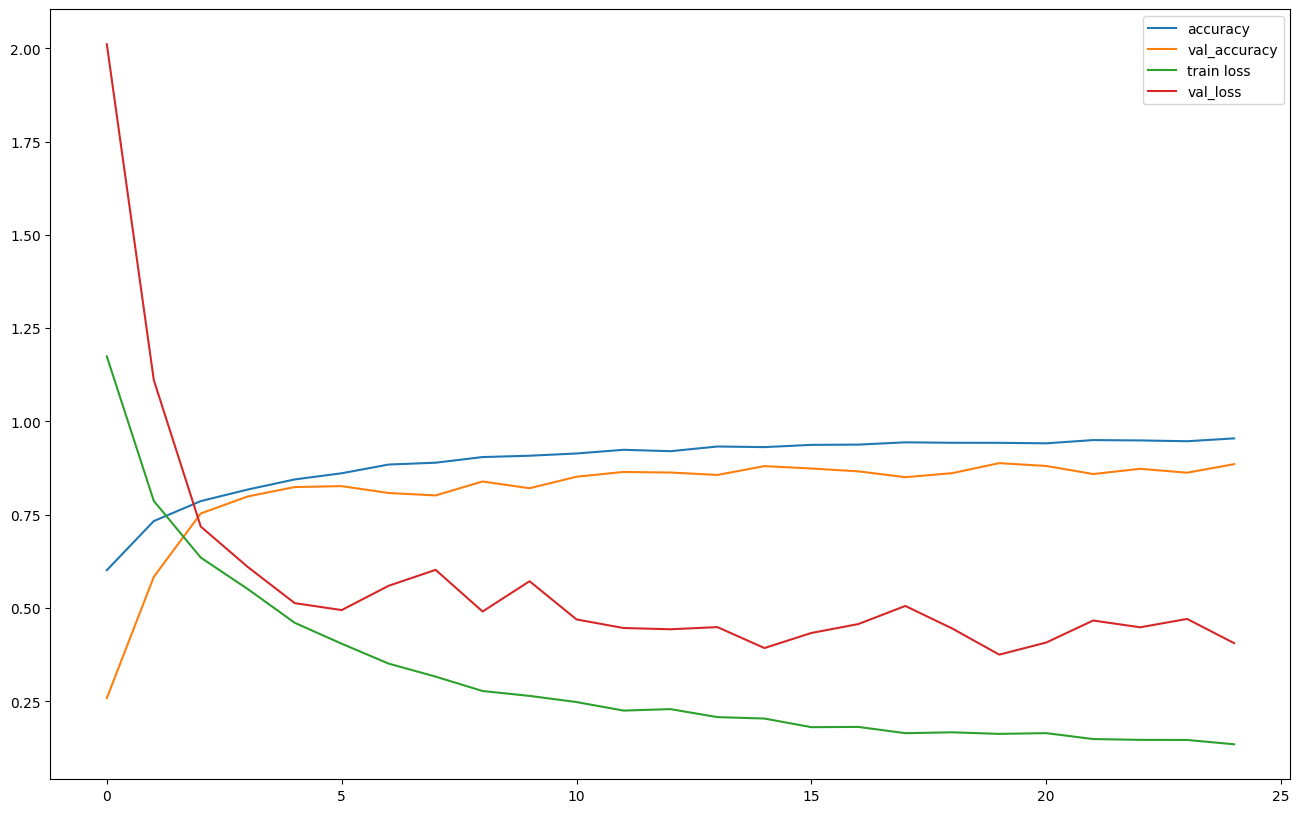

In [15]:
# plot model train en val history
plt.figure(figsize = (16, 10))
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [18]:
#hyperparameter tuning
import keras_tuner

def build_model(hp):
    model = tf.keras.Sequential(
        layers = [
            tf.keras.layers.Flatten(input_shape=(57,)),
            tf.keras.layers.Dense(units = hp.Choice('dense1', [1024, 512]), activation=tf.keras.activations.swish),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(units = hp.Choice('dense2', [512, 256]), activation=tf.keras.activations.swish),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(units = hp.Choice('dense3', [256, 128]), activation=tf.keras.activations.swish),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(units = hp.Choice('dense4', [256, 128]), activation=tf.keras.activations.swish),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
        ]
    )
    
    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.AdamW(),
              metrics='accuracy'
             )
    
    return model

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=10
)

tuner.search_space_summary()

Search space summary
Default search space size: 4
dense1 (Choice)
{'default': 1024, 'conditions': [], 'values': [1024, 512], 'ordered': True}
dense2 (Choice)
{'default': 512, 'conditions': [], 'values': [512, 256], 'ordered': True}
dense3 (Choice)
{'default': 256, 'conditions': [], 'values': [256, 128], 'ordered': True}
dense4 (Choice)
{'default': 256, 'conditions': [], 'values': [256, 128], 'ordered': True}


In [19]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 10 Complete [00h 00m 24s]
val_accuracy: 0.8126501441001892

Best val_accuracy So Far: 0.8126501441001892
Total elapsed time: 00h 03m 16s


In [20]:
#getting the best model
best_model = tuner.get_best_models(num_models=1)[0]

In [21]:
#training the best model
history_best = best_model.fit(X_train, y_train, 
                              validation_data=(X_test, y_test),
                              callbacks = EarlyStopping(patience=10),
                              epochs = 200)

Epoch 1/200
235/235 [==============================] - 8s 17ms/step - loss: 0.3641 - accuracy: 0.8739 - val_loss: 0.6346 - val_accuracy: 0.8010
Epoch 2/200
235/235 [==============================] - 4s 16ms/step - loss: 0.3248 - accuracy: 0.8905 - val_loss: 0.6494 - val_accuracy: 0.7806
Epoch 3/200
235/235 [==============================] - 4s 16ms/step - loss: 0.2661 - accuracy: 0.9084 - val_loss: 0.4287 - val_accuracy: 0.8611
Epoch 4/200
235/235 [==============================] - 4s 16ms/step - loss: 0.2490 - accuracy: 0.9119 - val_loss: 0.4641 - val_accuracy: 0.8543
Epoch 5/200
235/235 [==============================] - 4s 17ms/step - loss: 0.2425 - accuracy: 0.9199 - val_loss: 0.3727 - val_accuracy: 0.8775
Epoch 6/200
235/235 [==============================] - 4s 17ms/step - loss: 0.2051 - accuracy: 0.9289 - val_loss: 0.5606 - val_accuracy: 0.8303
Epoch 7/200
235/235 [==============================] - 4s 16ms/step - loss: 0.2102 - accuracy: 0.9266 - val_loss: 0.5310 - val_accuracy:

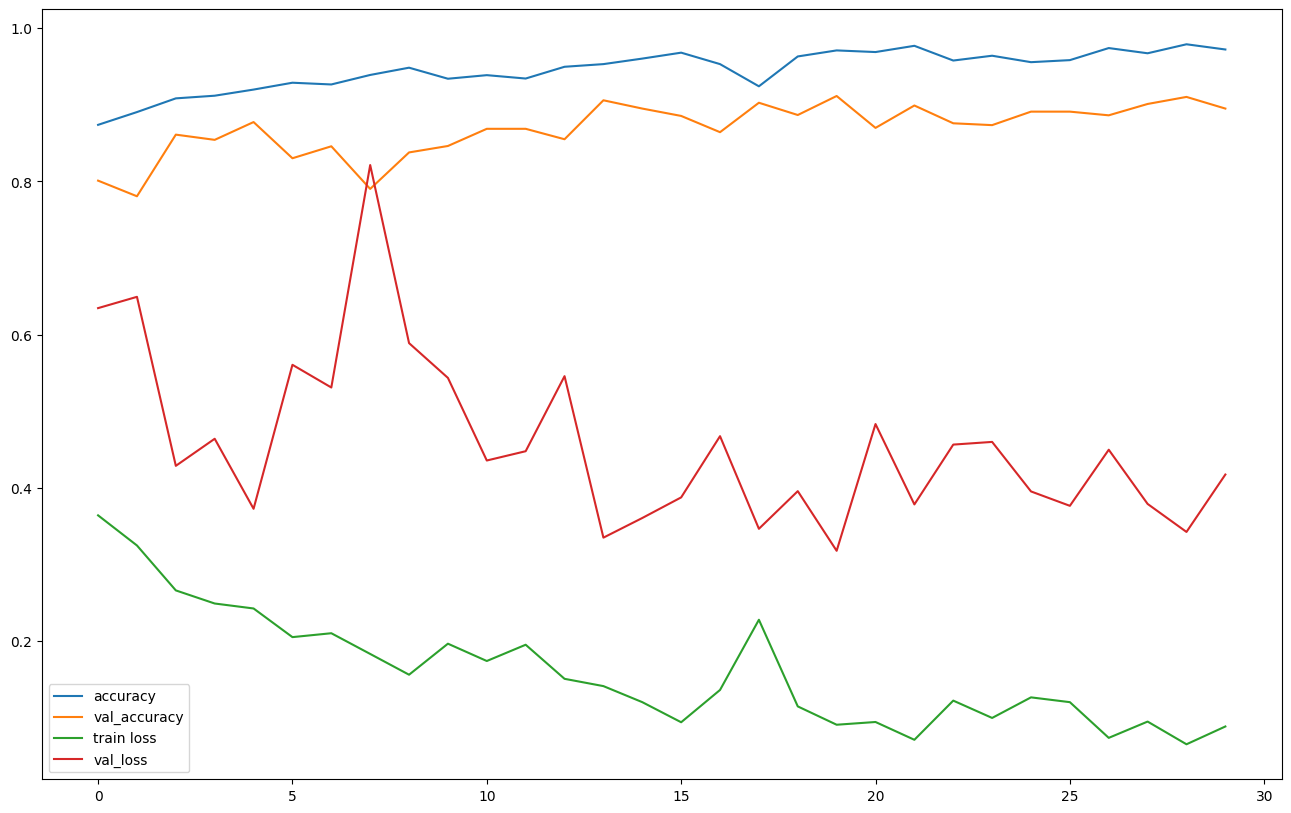

In [22]:
plt.figure(figsize = (16, 10))
plt.plot(history_best.history['accuracy'], label = 'accuracy')
plt.plot(history_best.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history_best.history['loss'], label = 'train loss')
plt.plot(history_best.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [26]:
!pip install seaborn --upgrade

79/79 [==============================] - 0s 2ms/step


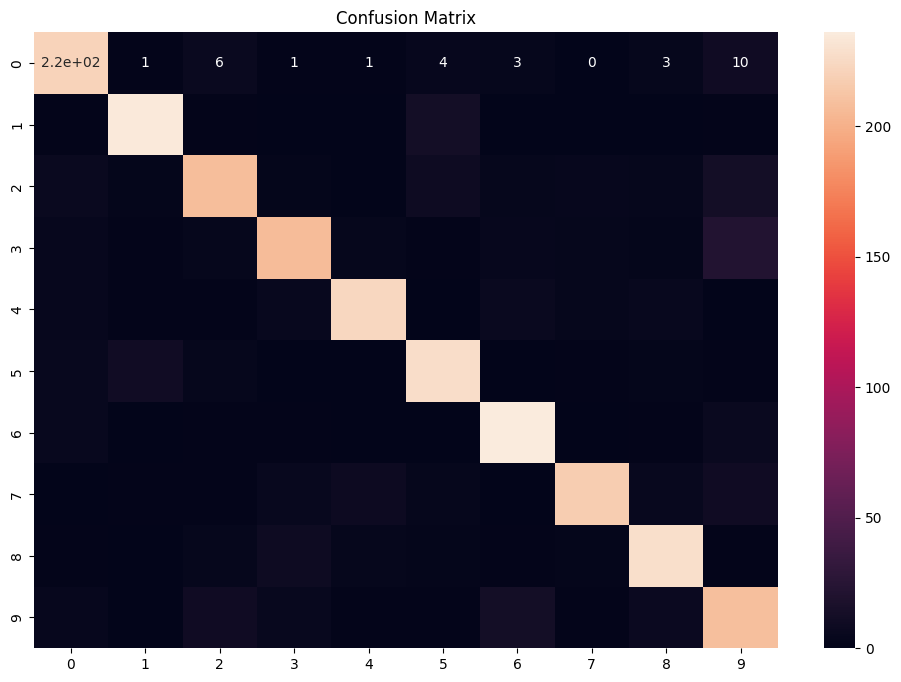

In [28]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = best_model.predict(X_test)

# confusion matrix for best model
y_pred = np.argmax(model.predict(X_test), axis =1)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12,8))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=True)
plt.show()

### Saving the model

In [24]:
best_model.save('dense-gtzan.keras')

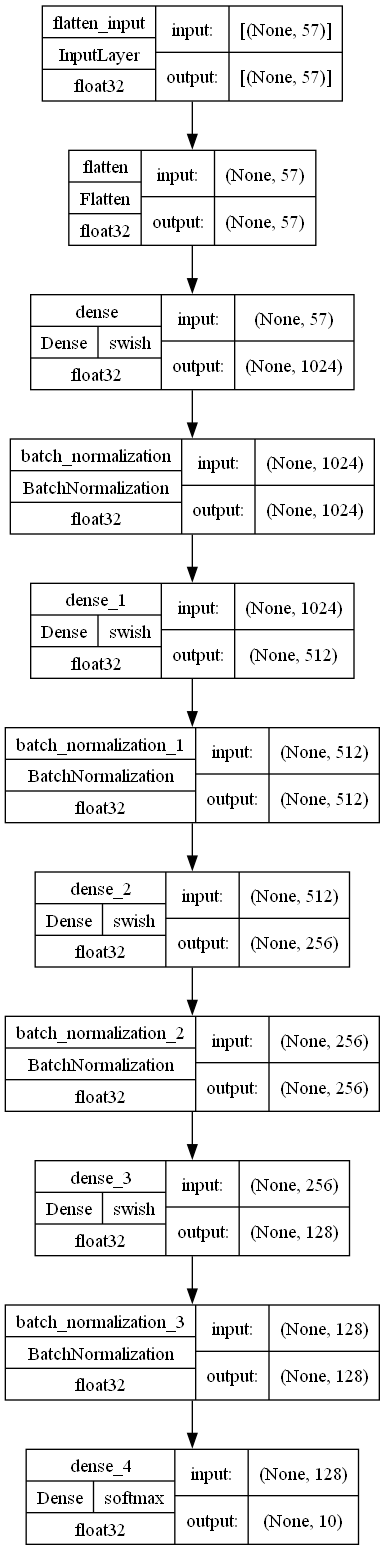

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(best_model, show_dtype=True, show_layer_activations=True, show_layer_names=True, show_shapes=True)

In [41]:
[np.argmax(i) for i in best_model.predict(X_test)]

79/79 [==============================] - 0s 3ms/step


[6,
 6,
 3,
 9,
 0,
 3,
 2,
 1,
 4,
 2,
 1,
 6,
 3,
 1,
 7,
 5,
 3,
 0,
 0,
 5,
 6,
 5,
 3,
 2,
 7,
 1,
 9,
 7,
 6,
 5,
 9,
 3,
 8,
 6,
 0,
 9,
 3,
 9,
 3,
 9,
 5,
 2,
 0,
 2,
 1,
 8,
 3,
 4,
 5,
 8,
 7,
 9,
 4,
 9,
 5,
 6,
 4,
 6,
 1,
 9,
 5,
 7,
 9,
 2,
 2,
 1,
 7,
 5,
 3,
 6,
 8,
 8,
 6,
 5,
 8,
 2,
 9,
 0,
 1,
 3,
 6,
 3,
 3,
 6,
 2,
 5,
 3,
 0,
 0,
 4,
 2,
 8,
 1,
 6,
 0,
 3,
 5,
 3,
 9,
 4,
 6,
 6,
 5,
 5,
 5,
 5,
 8,
 0,
 1,
 1,
 2,
 1,
 5,
 7,
 9,
 1,
 5,
 0,
 4,
 7,
 5,
 2,
 7,
 7,
 6,
 3,
 3,
 3,
 2,
 3,
 9,
 7,
 1,
 5,
 3,
 5,
 5,
 1,
 9,
 0,
 6,
 0,
 6,
 3,
 0,
 4,
 1,
 5,
 1,
 0,
 5,
 7,
 1,
 8,
 9,
 9,
 6,
 8,
 8,
 0,
 7,
 0,
 5,
 9,
 1,
 1,
 4,
 5,
 2,
 5,
 5,
 8,
 3,
 4,
 1,
 8,
 4,
 2,
 5,
 6,
 9,
 8,
 2,
 9,
 9,
 7,
 4,
 8,
 7,
 5,
 3,
 5,
 0,
 8,
 4,
 4,
 7,
 6,
 1,
 3,
 9,
 4,
 4,
 1,
 4,
 6,
 9,
 1,
 2,
 6,
 2,
 0,
 1,
 9,
 6,
 4,
 2,
 9,
 5,
 4,
 6,
 9,
 4,
 1,
 5,
 8,
 2,
 1,
 1,
 6,
 4,
 3,
 1,
 9,
 8,
 0,
 6,
 7,
 2,
 5,
 8,
 0,
 3,
 5,
 5,
 7,
 5,
 2,
 9,
 7,


In [42]:
X_test

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
6162,0.745874,0.417713,0.244584,0.009058,0.427827,0.030472,0.579212,0.016527,0.526903,0.035038,...,0.500597,0.022346,0.269883,0.031414,0.408641,0.010907,0.362628,0.009712,0.562517,0.014003
6481,0.580568,0.424588,0.480432,0.025273,0.451977,0.010301,0.536617,0.027894,0.497843,0.020785,...,0.430106,0.051495,0.323940,0.042897,0.455145,0.035221,0.434599,0.012271,0.651064,0.029608
3212,0.459437,0.724547,0.282319,0.061337,0.580408,0.092060,0.887203,0.055555,0.808172,0.053534,...,0.267279,0.030532,0.308217,0.050288,0.283247,0.067046,0.324650,0.040915,0.438016,0.038123
9370,0.487534,0.593860,0.257274,0.020695,0.454312,0.074942,0.605190,0.096092,0.504840,0.126724,...,0.337364,0.036811,0.333868,0.064165,0.256543,0.054317,0.346011,0.029899,0.425671,0.038015
853,0.342199,0.758863,0.384266,0.140389,0.116255,0.049723,0.296298,0.091378,0.150264,0.095602,...,0.525846,0.173692,0.336606,0.138348,0.340356,0.067458,0.477408,0.042780,0.465753,0.044212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0.217192,0.599448,0.241127,0.015717,0.425406,0.038105,0.553031,0.027701,0.512635,0.032031,...,0.654647,0.137176,0.329878,0.141320,0.452718,0.067519,0.315557,0.035600,0.449747,0.089076
8201,0.452886,0.662859,0.297301,0.070171,0.250786,0.229792,0.459159,0.221082,0.323500,0.324285,...,0.542066,0.106357,0.384289,0.150474,0.482410,0.085920,0.448236,0.062958,0.548229,0.059457
4355,0.690638,0.601310,0.262216,0.094228,0.475215,0.229190,0.683770,0.243154,0.589141,0.283225,...,0.388182,0.070490,0.464201,0.054822,0.405346,0.064031,0.535348,0.021059,0.538819,0.038438
4253,0.498159,0.714117,0.507000,0.252696,0.329413,0.073474,0.505242,0.061169,0.421956,0.092929,...,0.558429,0.144793,0.483369,0.416445,0.572612,0.315884,0.533615,0.081330,0.518512,0.133344


In [46]:
scaler.scale_

array([1.55672788e+00, 9.46794517e+00, 2.26442474e+00, 3.06605714e+01,
       2.01621327e-04, 2.08624246e-07, 3.11625050e-04, 8.10399702e-07,
       1.13261697e-04, 7.70293853e-08, 2.99240210e+00, 1.53420456e+01,
       2.36070799e+01, 7.87082388e+00, 6.40503688e+01, 1.69839709e+01,
       3.80615751e-03, 1.29851083e-03, 2.22211435e-05, 3.79844124e-03,
       1.95223987e-04, 5.40260900e-03, 2.41211990e-04, 8.00923746e-03,
       4.34742616e-04, 1.05573226e-02, 6.45490854e-04, 1.11963144e-02,
       1.13545922e-03, 1.37839687e-02, 1.50442822e-03, 9.43148757e-03,
       1.85714111e-03, 1.39642696e-02, 2.42156747e-03, 1.09383221e-02,
       2.10822194e-03, 1.15421523e-02, 1.45587904e-03, 1.33537921e-02,
       1.74717284e-03, 1.52617079e-02, 1.77285058e-03, 1.72046951e-02,
       1.11807005e-03, 1.71801147e-02, 1.61390714e-03, 1.51527960e-02,
       1.46497229e-03, 1.61658908e-02, 1.89487679e-03, 1.73297821e-02,
       1.59669839e-03, 1.70027889e-02, 8.77065817e-04, 1.43158265e-02,
      

In [47]:
scaler.min_

array([-1.66737634e-01, -1.45283253e-01, -2.15910114e-03, -1.34279033e-06,
       -9.53147961e-02, -1.69378125e-04, -1.55551667e-01, -9.59124521e-04,
       -7.45642834e-02, -8.82064670e-05, -4.04734074e-02, -7.70570317e-05,
        6.29651246e-01, -7.32955410e-22,  5.63254493e-01, -7.93498731e-07,
       -9.27835052e-02,  8.59837034e-01, -5.59762569e-04,  4.57841028e-02,
       -1.88702154e-03,  5.63221081e-01, -4.95745864e-04,  2.81432531e-01,
       -1.53915095e-03,  5.05556182e-01, -6.29620871e-03,  3.90631159e-01,
       -5.98138436e-03,  6.22856462e-01, -1.13757434e-02,  3.80310280e-01,
       -1.28126019e-02,  5.50914898e-01, -1.99835342e-02,  3.59143900e-01,
       -1.59906806e-02,  4.61780666e-01, -7.27778255e-03,  3.17275356e-01,
       -4.09822549e-03,  4.47938759e-01, -1.38390800e-02,  4.02419384e-01,
       -3.61144838e-03,  5.23428046e-01, -2.39167666e-03,  4.06852810e-01,
       -1.94223974e-03,  4.49570116e-01, -3.07831009e-03,  3.59312383e-01,
       -5.48855364e-03,  

In [48]:
scaler

MinMaxScaler()

In [77]:
[idx for idx, _ in enumerate(le.classes_=='blues') if _]

[0]

In [83]:
df = pd.read_csv('GTZAN/features_30_sec.csv')

y = df['label'].map(lambda x: [idx for idx, _ in enumerate(le.classes_==x) if _][0])

In [84]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    9
996    9
997    9
998    9
999    9
Name: label, Length: 1000, dtype: int64

In [85]:
test = pd.read_csv('30sec.csv')
test.drop("Unnamed: 0", axis=1, inplace=True)
best_model.evaluate(test, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.0377 - accuracy: 0.9840


[0.03772609680891037, 0.984000027179718]

In [62]:
y_test

6162    6
6481    6
3212    3
9370    9
853     0
       ..
683     0
8201    8
4355    4
4253    4
9673    9
Name: label, Length: 2498, dtype: int32

In [58]:
best_model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 4ms/step - loss: 0.4174 - accuracy: 0.8951


[0.4173780083656311, 0.8951160907745361]